In [1]:
print('22')

22


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px

In [3]:
from manoFunkcijos import pout

In [4]:
#prisijungimas prie mySQL, ir kursoriaus sukūrimas
DB = cnt.connect(
    host = '88.223.121.130',
    user='user',
    password='slaptazodis',
    port=3306,
    database='works'
    )
C=DB.cursor()

Raskite 5 top 2014 metais apmokamas specialybes, atvaizduokite jų vidutinį atlyginimą stulpeline diagrama (bar arba barh).
Raskite 5 mažiausiai apmokamas specialybes 2014 metais, atvaizduokite jų vidutinį atlyginimą su bar arba barh.
Raskite 5 vidutiniškai apmokamas specialybes (0.9-1.1 VDU, imate arčiausiai 1.1 VDU esančias), atvaizduojate vidutinius atlyginimas su bar arba barh.
Tada surandate šių 15-kos specialybių atlyginimų pokytį tarp 2014 ir 2018 metų, pokytį vizualizuokite su bar arba barh. Kokios specialybėsm tas pokytis didžiausias?

In [5]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""select P.Profesija, avg14 from (select profesija as p14, avg(bdu_spalio)/3.4528 as avg14
from DUS2014N
group by profesija) as T14
join profesijos as P 
on T14.p14 = P.Kodas
order by avg14 desc limit 5;"""
C.execute(sql)
ans = C.fetchall()
Ptop5, PvidTop5 = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

| 0 |Informacinių t|1668.213230953|
| 1 |Teisės aktų le|1606.340548846|
| 2 |Laivų ir orlai|1428.772174819|
| 3 |Pardavimo, rin|1380.549003241|
| 4 |Profesionaliųj|1355.068872386|


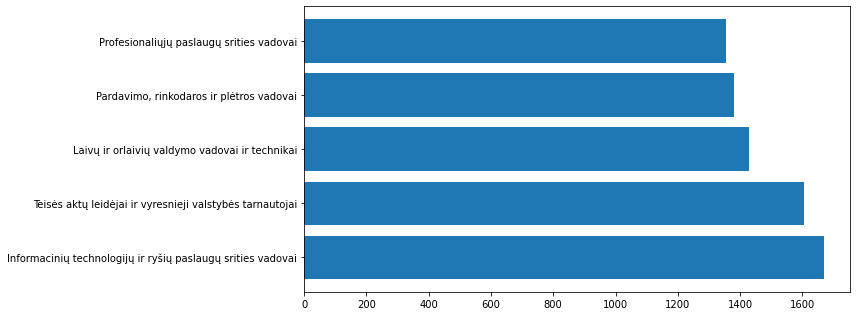

In [6]:
fig, axis = plt.subplots(figsize=(12,4.5))
#plotting code:

axis.barh(Ptop5, PvidTop5)
#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

| 0 |Kelionių palyd|741.6736017854|
| 1 |Laivų įgulų na|722.2294542542|
| 2 |Fizinių mokslų|713.0106760484|
| 3 |Kalviai, įrank|711.2183897260|
| 4 |Skardininkai, |705.4209522789|


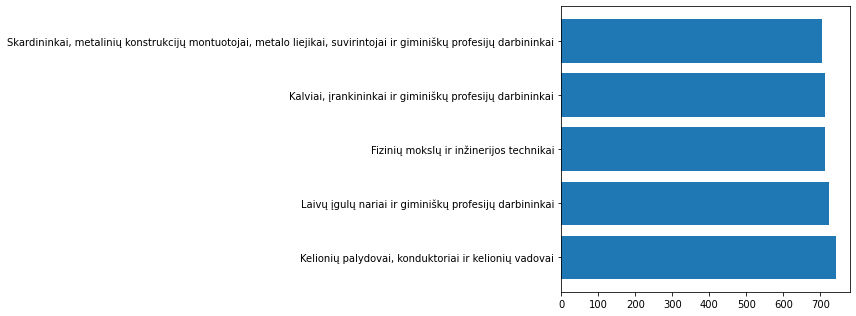

In [7]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""select P.Profesija, avg14 from (select profesija as p14, avg(bdu_spalio)/3.4528 as avg14
from DUS2014N
group by profesija) as T14
join profesijos as P 
on T14.p14 = P.Kodas
WHERE 
avg14 >= 0.9*(select avg(bdu_spalio)/3.4528 from DUS2014N)
and avg14 <= 1.1*(select avg(bdu_spalio)/3.4528 from DUS2014N)
order by avg14 desc limit 5;"""
C.execute(sql)
ans = C.fetchall()
Pv5, pv5= list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)
fig, axis = plt.subplots(figsize=(12,4.5))
#plotting code:
axis.barh(Pv5, pv5)

#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

| 0 |Kirpėjai, kosm|262.5770698766|
| 1 |Namų, viešbuči|277.7147576568|
| 2 |Kiti paslaugų |290.2378194095|
| 3 |Gatvės prekyst|309.4924074998|
| 4 |Padavėjai ir b|312.6413093846|


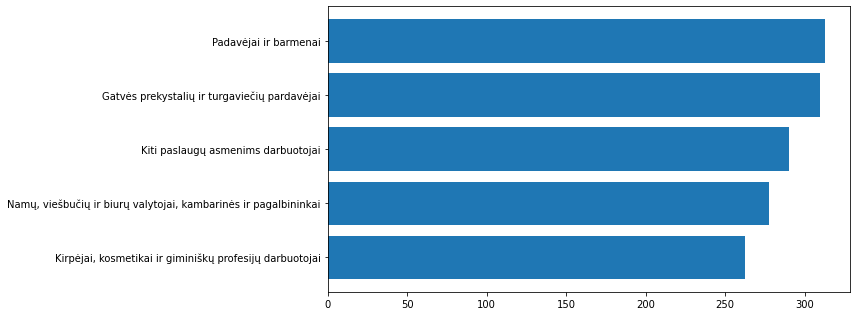

In [8]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""select P.Profesija, avg14 from (select profesija as p14, avg(bdu_spalio)/3.4528 as avg14
from DUS2014N
group by profesija) as T14
join profesijos as P 
on T14.p14 = P.Kodas
order by avg14 asc limit 5;"""
C.execute(sql)
ans = C.fetchall()
Pmin, pmin5 = list(map(list, zip(*ans)))
pout(ans)
#? = np.transpose(ans)
fig, axis = plt.subplots(figsize=(12,4.5))
#plotting code:

axis.barh(Pmin, pmin5)
#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

In [9]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""
select Kodas, Profesija, round(avg14,2) as A14, round(avg18,2) as A18, round(avg18-avg14, 2) as Δ,
round((avg18-avg14)/avg14*100.0,2) as `Δ[%]`
from
(select * from
(select * from (select profesija as p14, avg(bdu_spalio)/3.4528 as avg14
from DUS2014N
group by profesija) as T14
join profesijos as P 
on T14.p14 = P.Kodas
order by avg14 desc limit 5) as T1
union all 
select * from
(select * from (select profesija as p14, avg(bdu_spalio)/3.4528 as avg14
from DUS2014N
group by profesija) as T14
join profesijos as P 
on T14.p14 = P.Kodas
WHERE 
avg14 >= 0.9*(select avg(bdu_spalio)/3.4528 from DUS2014N)
and avg14 <= 1.1*(select avg(bdu_spalio)/3.4528 from DUS2014N)
order by avg14 desc limit 5) as T2
union all
select * from
(select * from (select profesija as p14, avg(bdu_spalio)/3.4528 as avg14
from DUS2014N
group by profesija) as T14
join profesijos as P 
on T14.p14 = P.Kodas
order by avg14 asc limit 5) as T3
) as TFF
inner JOIN 
(select Kodas, Profesija as Prof18, a18 as avg18 from
(select * from (select profesija as p18, avg(bdu_spalio) as a18
from DUS2018N
group by profesija) as T18
join profesijos as P 
on T18.p18 = P.Kodas) as F) as TF18
using (Kodas) 
order by `Δ[%]` desc;
"""
C.execute(sql)
ans = C.fetchall()
Kodas, Profesija, A14, A18, Delta, DeltaProc = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans, 15)

| 0 |     514      |Kirpėjai, kosm|    262.58    |    483.83    |    221.26    |    84.26     |
| 1 |     315      |Laivų ir orlai|   1428.77    |   2267.91    |    839.14    |    58.73     |
| 2 |     516      |Kiti paslaugų |    290.24    |    435.90    |    145.67    |    50.19     |
| 3 |     911      |Namų, viešbuči|    277.71    |    402.09    |    124.37    |    44.78     |
| 4 |     513      |Padavėjai ir b|    312.64    |    447.13    |    134.49    |    43.02     |
| 5 |     721      |Skardininkai, |    705.42    |    991.06    |    285.64    |    40.49     |
| 6 |     835      |Laivų įgulų na|    722.23    |   1005.95    |    283.72    |    39.28     |
| 7 |     311      |Fizinių mokslų|    713.01    |    987.54    |    274.53    |     38.5     |
| 8 |     722      |Kalviai, įrank|    711.22    |    944.78    |    233.56    |    32.84     |
| 9 |     521      |Gatvės prekyst|    309.49    |    408.50    |    99.01     |    31.99     |
|10 |     122      |Pardavimo, rin|   13

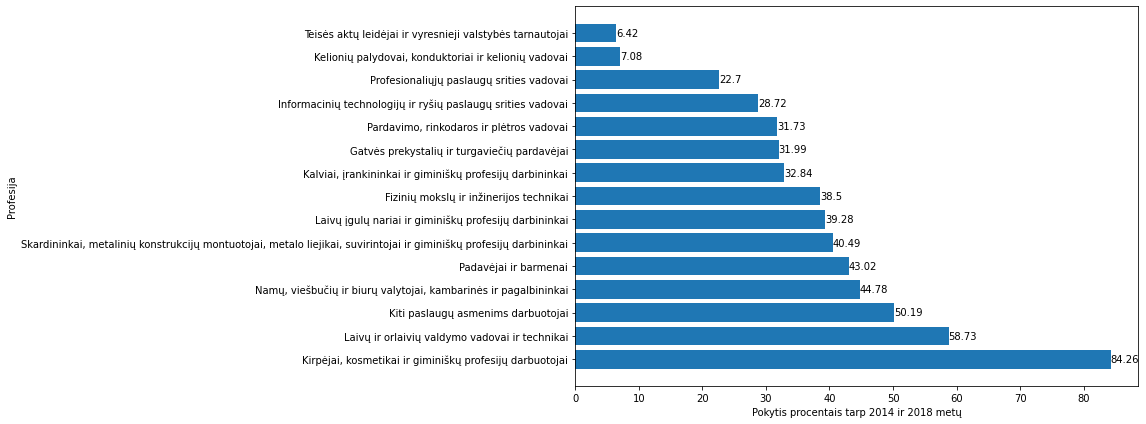

In [11]:
fig, axis = plt.subplots(figsize=(16,6))
#plotting code:
P = axis.barh(Profesija, DeltaProc)
axis.bar_label(P)
axis.set_xlabel('Pokytis procentais tarp 2014 ir 2018 metų')
axis.set_ylabel('Profesija')
#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

In [ ]:
# -- kokie eismo įvykiai sudarė top5? Pateikite procentinę vizualizaciją (pie chart).
# --  Lentelė EismIvyk2020, stulpelis schema1. 
# -- pateikite šių eismo įvykių pokytį tarp 2020 ir 2021 metų, procentais, barh grafiku.

In [12]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""SELECT *, (C21-C20)/C21*100 AS `Δ[%]`
FROM (
SELECT 
schema1, count(*) AS C20
FROM EismIvyk2020 
GROUP BY schema1) AS T1
JOIN 
(SELECT schema1, count(*) AS C21
FROM EismIvyk2021 
GROUP BY schema1)
AS T2 
USING (schema1)
ORDER BY `Δ[%]` DESC;"""
C.execute(sql)
ans = C.fetchall()
schema, c20, c21, prc = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

Rodoma 5 eilutės iš 9
| 0 |Priešpriešinia|     762      |     916      |   16.8122    |
| 1 |Kiti eismo įvy|    10492     |    11496     |    8.7335    |
| 2 |Nuvažiavimai n|     2464     |     2547     |    3.2587    |
| 3 |Susidūrimas su|     421      |     432      |    2.5463    |
| 4 |Užvažiavimas a|     383      |     388      |    1.2887    |


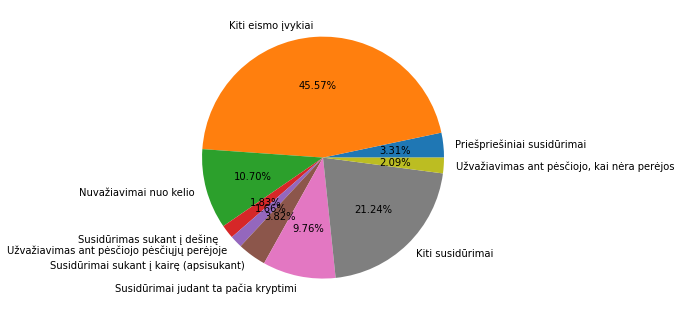

In [13]:
fig, axis = plt.subplots(figsize=(8,4.5))
#plotting code:
axis.pie(c20, labels=schema, autopct='%.2f%%')

#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

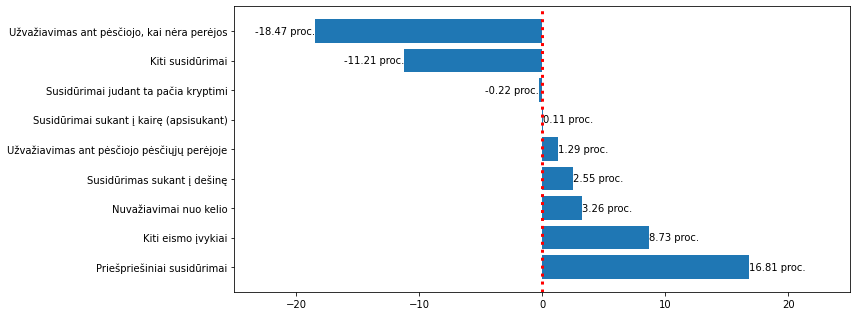

In [19]:
fig, axis = plt.subplots(figsize=(12,4.5))
#plotting code:
p = axis.barh(schema, prc)
axis.bar_label(p, fmt='%.2f proc.')
axis.axvline(x=0, color='red', linewidth=3, linestyle=':')
axis.set_xlim(-25, 25)
#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

In [ ]:
# -- Pateikite lentelę, kurioje būtų vidutinė kaina jūsų pasirinktam ploto intervalui
# -- pavyzdžiui, suskirstote butų plotus 5 kv m intervalais, ir suraskite 
# -- vidutinę kainą tam intervalui.
# -- Ar kaina yra linkusi didėti, didėjant plotui?